In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_excel("dataset.xlsx")
print(df.head())

   year  emission from cement manufacturing  emission from fossil fuels  \
0  1960                                4.00                         NaN   
1  1961                                4.20                         NaN   
2  1962                                4.38                         NaN   
3  1963                                4.77                         NaN   
4  1964                                4.94                         NaN   

  emission from combustion of gas(in million metric tonnes)  \
0                                                  -          
1                                                  0          
2                                               0.01          
3                                               0.01          
4                                               0.02          

   emission from combustion of oil(in million metric tonnes)  \
0                                              19.44           
1                                         

In [3]:
print(df.shape)

(64, 13)


In [4]:
print(df.describe())

              year  emission from cement manufacturing  \
count    64.000000                           64.000000   
mean   1991.500000                           45.772813   
std      18.618987                           48.139605   
min    1960.000000                            4.000000   
25%    1975.750000                            7.495000   
50%    1991.500000                           24.830000   
75%    2007.250000                           69.557500   
max    2023.000000                          177.230000   

       emission from fossil fuels  \
count                   54.000000   
mean                     0.979074   
std                      0.523011   
min                      0.370000   
25%                      0.510000   
50%                      0.865000   
75%                      1.402500   
max                      2.070000   

       emission from combustion of oil(in million metric tonnes)  \
count                                          64.000000           
mean   

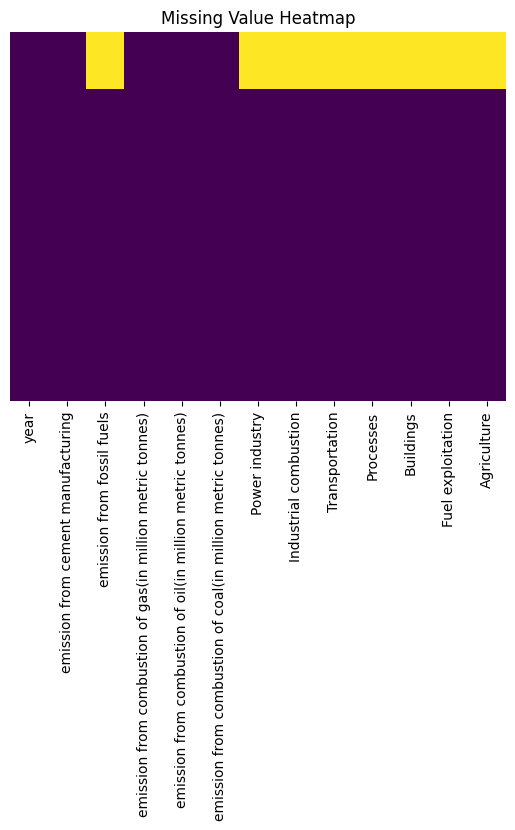

In [5]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

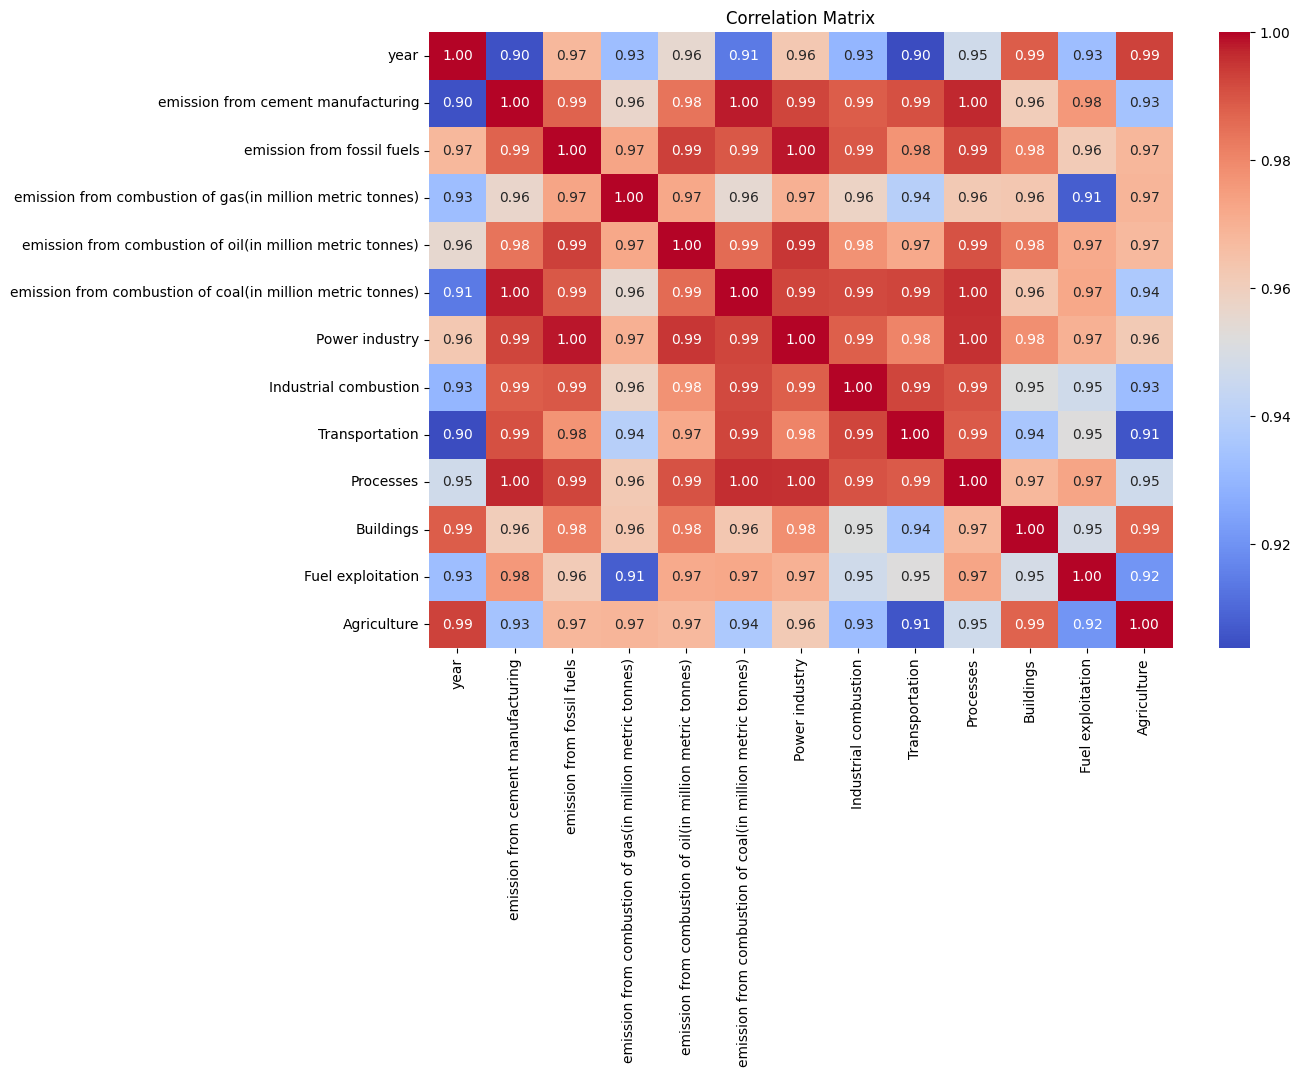

In [6]:
df_cleaned = df.replace('-', np.nan)

df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

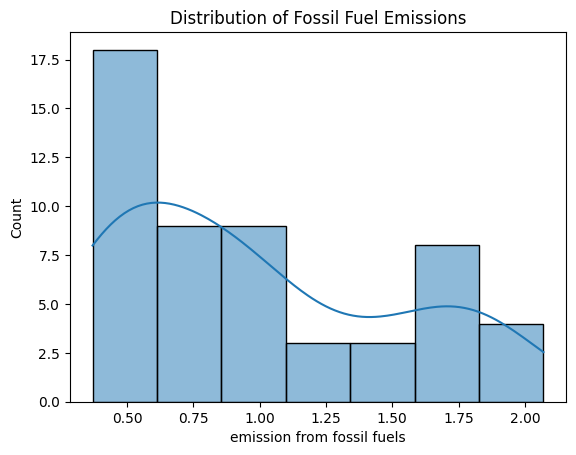

In [7]:
sns.histplot(data=df, x='emission from fossil fuels', kde=True)
plt.title("Distribution of Fossil Fuel Emissions")
plt.show()

In [8]:
df.replace('-', np.nan, inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['emission from fossil fuels'])
y = df_imputed['emission from fossil fuels']


In [9]:
X = df_imputed.drop(columns=['emission from fossil fuels'])
y = df_imputed['emission from fossil fuels']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))


Linear Regression
MAE: 0.01748017494635005
RMSE: 0.023535512708360618
R² Score: 0.9977632981657976

Random Forest
MAE: 0.01525028490028426
RMSE: 0.02393744935754994
R² Score: 0.9976862495741855

Gradient Boosting
MAE: 0.020416132318969295
RMSE: 0.028436544224947242
R² Score: 0.9967347653147682

SVR
MAE: 0.050300398827499
RMSE: 0.05546513939370735
R² Score: 0.9875777294348124


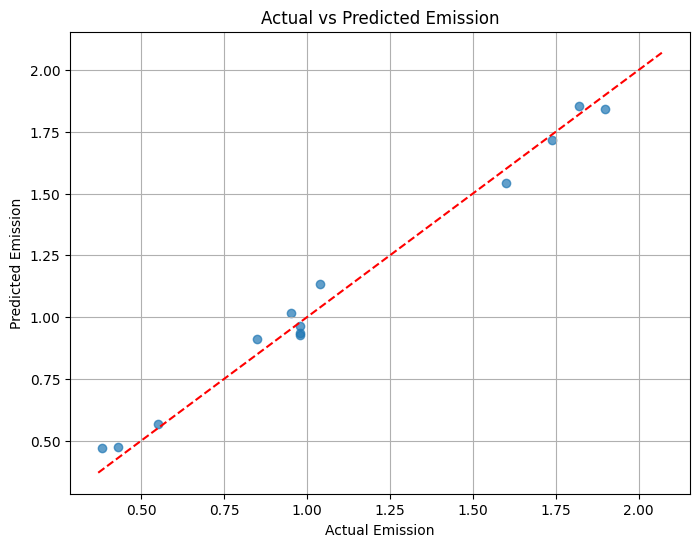

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Emission")
plt.ylabel("Predicted Emission")
plt.title("Actual vs Predicted Emission")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line y=x
plt.grid(True)
plt.show()